## Dirbame su klasifikacijos problemomis

- Išmėginsime logistinę regresiją
- Atvaizduosime decision boundary
- Pradedame dirbti su vaizdais

In [1]:
#įsikeliame reikalingas bibliotekas

import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import decomposition
from sklearn import datasets

import keras

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# from mlxtend.plotting import plot_decision_regions

Using TensorFlow backend.


In [2]:
# Sukuriame duomenų rinkinį
X, y = datasets.make_classification(n_classes=2, n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

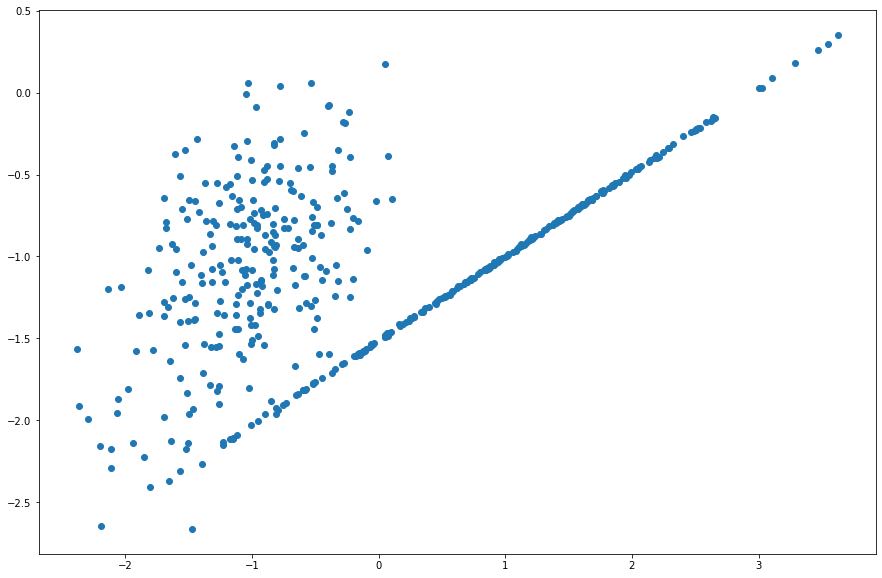

In [3]:
#Atvaizduojame

plt.scatter(X[:, 0], X[:, 1])

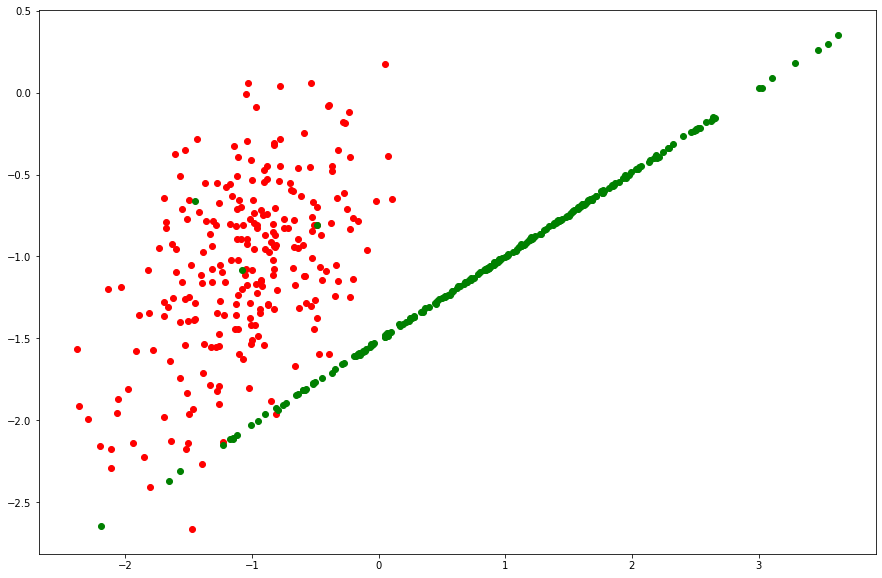

In [4]:
#Atvaizduojame su klasėmis

for i in range(2): 
    rows = np.where(y == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)

In [5]:
#Sukuriame modelį

model = keras.models.Sequential()

#pridedame sluoksnį su vienu tašku ("neuronu")
model.add(keras.layers.Dense(1, input_dim=2, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#Standartizuojame:

X = (X-X.mean())/X.std()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Mokome

model.fit(X, y, epochs = 200, )

Epoch 1/200
500/500 [==============================] - 0s 264us/step - loss: 0.6133 - accuracy: 0.6680
Epoch 2/200
500/500 [==============================] - 0s 52us/step - loss: 0.6064 - accuracy: 0.6980
Epoch 3/200
500/500 [==============================] - 0s 58us/step - loss: 0.5998 - accuracy: 0.7280
Epoch 4/200
500/500 [==============================] - 0s 58us/step - loss: 0.5931 - accuracy: 0.7520
Epoch 5/200
500/500 [==============================] - 0s 64us/step - loss: 0.5870 - accuracy: 0.7700
Epoch 6/200
500/500 [==============================] - 0s 70us/step - loss: 0.5807 - accuracy: 0.7960
Epoch 7/200
500/500 [==============================] - 0s 52us/step - loss: 0.5749 - accuracy: 0.8140
Epoch 8/200
500/500 [==============================] - 0s 56us/step - loss: 0.5690 - accuracy: 0.8440
Epoch 9/200
500/500 [==============================] - 0s 56us/step - loss: 0.5634 - accuracy: 0.8520
Epoch 10/200
500/500 [==============================] - 0s 54us/step - loss: 0.55

500/500 [==============================] - 0s 48us/step - loss: 0.3462 - accuracy: 0.9340
Epoch 81/200
500/500 [==============================] - 0s 56us/step - loss: 0.3444 - accuracy: 0.9340
Epoch 82/200
500/500 [==============================] - 0s 54us/step - loss: 0.3428 - accuracy: 0.9340
Epoch 83/200
500/500 [==============================] - 0s 48us/step - loss: 0.3410 - accuracy: 0.9340
Epoch 84/200
500/500 [==============================] - 0s 82us/step - loss: 0.3393 - accuracy: 0.9340
Epoch 85/200
500/500 [==============================] - 0s 52us/step - loss: 0.3377 - accuracy: 0.9340
Epoch 86/200
500/500 [==============================] - 0s 44us/step - loss: 0.3360 - accuracy: 0.9340
Epoch 87/200
500/500 [==============================] - 0s 46us/step - loss: 0.3344 - accuracy: 0.9340
Epoch 88/200
500/500 [==============================] - 0s 56us/step - loss: 0.3328 - accuracy: 0.9340
Epoch 89/200
500/500 [==============================] - 0s 56us/step - loss: 0.3312 - 

500/500 [==============================] - 0s 52us/step - loss: 0.2511 - accuracy: 0.9480
Epoch 160/200
500/500 [==============================] - 0s 46us/step - loss: 0.2503 - accuracy: 0.9480
Epoch 161/200
500/500 [==============================] - 0s 40us/step - loss: 0.2494 - accuracy: 0.9480
Epoch 162/200
500/500 [==============================] - 0s 32us/step - loss: 0.2486 - accuracy: 0.9480
Epoch 163/200
500/500 [==============================] - 0s 46us/step - loss: 0.2479 - accuracy: 0.9480
Epoch 164/200
500/500 [==============================] - 0s 42us/step - loss: 0.2470 - accuracy: 0.9480
Epoch 165/200
500/500 [==============================] - 0s 46us/step - loss: 0.2462 - accuracy: 0.9480
Epoch 166/200
500/500 [==============================] - 0s 64us/step - loss: 0.2455 - accuracy: 0.9480
Epoch 167/200
500/500 [==============================] - 0s 54us/step - loss: 0.2447 - accuracy: 0.9480
Epoch 168/200
500/500 [==============================] - 0s 46us/step - loss: 

In [7]:
y_pred = model.predict(X)

In [8]:
y_pred = y_pred.round().ravel()

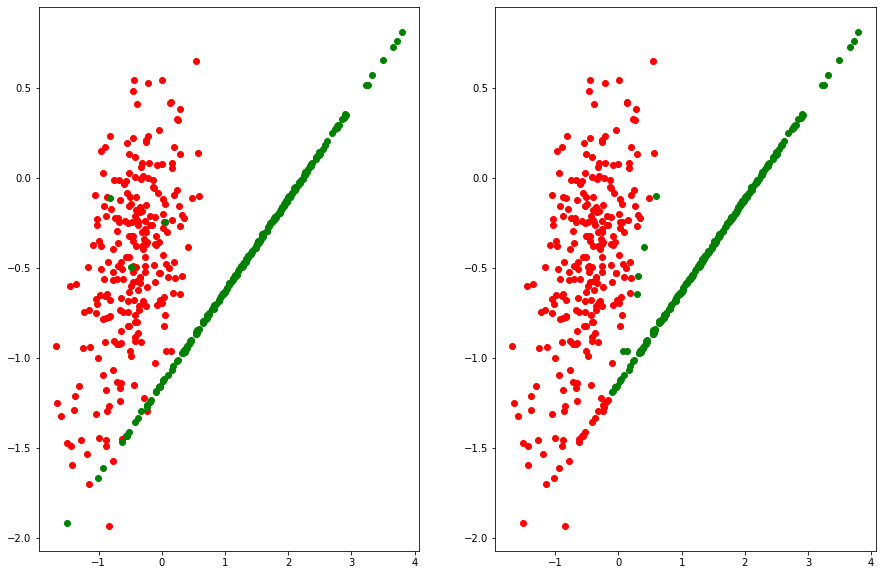

In [9]:
#Spėjimai, ant treniravmo duomenų ir palyginimas su tuo, ką gavome.

plt.subplot(1, 2, 1)
for i in range(2): 
    rows = np.where(y == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)

plt.subplot(1, 2, 2)
for i in range(2): 
    rows = np.where(y_pred == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)
    


In [10]:
#Atvaizduojame išmoktą decision boundary

plot_decision_regions(X, y, clf=model, legend=2)

NameError: name 'plot_decision_regions' is not defined

In [ ]:
#Pamėginkime atlikti spėjimus naujiems duomenų taškams.

model.predict(np.array([-1, -2])[np.newaxis])

## Užduotis

- Naudojant MNIST duomenų rinkinį sukurti klasifikatorių, kuris iš vaizdo pasakytų, ar matomas skaičius lyginis, ar nelyginis.

- Įvertinkite modelio veikimą ant testavimo duomenų.

- Atlikite keletą spėjimų, įsitikinkite, kaip veikia jūsų modelis


In [11]:
#TWO CLASSES

# Model / data parameters
num_classes = 2
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train = np.array([np.reshape(cv2.resize(im, (14, 14)), (14, 14, 1)) for im in x_train])
print(y_train.shape)



y_train = np.array([int(y%2==0) for y in y_train])
y_test = np.array([int(y%2==0) for y in y_test])

print("x_train shape:", x_train.shape)


11493376/11490434 [==============================] - 6s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000,)
x_train shape: (60000, 14, 14, 1)


(14, 14, 1)
0


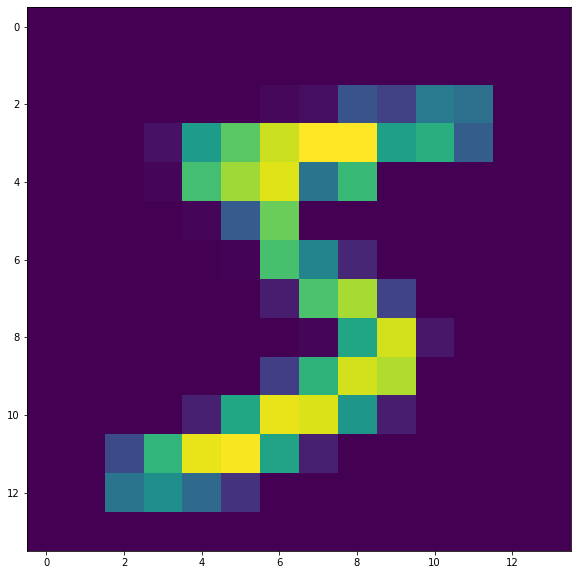

In [12]:

print(x_train[0].shape)
print(y_train[0])
plt.imshow(x_train[0, :, :, 0])

In [16]:
#Jūsų modelis:
#Sukuriame modelį
model = keras.models.Sequential()

#pridedame sluoksnį su vienu tašku ("neuronu")
model.add(keras.layers.Dense(1, input_dim=2, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Nepamirškite, kad modelis priima išskleistus paveikslėlius, tam galima naudoti keras Flatten() sluoksnį.
model.add(keras.layers.Flatten())
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [ ]:
#Mokymas



In [ ]:
#Modelio vertinimas naudojant testavimo duomenimis